In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from functions import *

Comparing R-squared values across different levels of SNRs for HS and default RF

In [2]:
path = "/home/sourav/rf-shrinkage-simulations/pycharm_rf"
pkl_dir = "/home/sourav/rf-shrinkage-simulations/pkl"

In [ ]:
#df = pd.read_pickle(os.path.join(pkl_dir, "hs_mse_mid_parallel.pkl"))

In [4]:
#df.head(15)

In [ ]:

#best_rows = df.sort_values("rte_best").groupby(["snr", "rep"], as_index=False).first()

# idx = df.groupby(["snr", "rep"])["rte_best"].idxmin()
# best_rows = df.loc[idx].reset_index(drop=True)

# best_rows["r2_def"]  = 1 - best_rows["rte_def"]  / (1 + best_rows["snr"])
# best_rows["r2_best"] = 1 - best_rows["rte_best"] / (1 + best_rows["snr"])

#
# df_r2 = best_rows[["snr", "rep", "r2_def", "r2_best"]].melt(
#     id_vars=["snr", "rep"],
#     value_vars=["r2_def", "r2_best"],
#     var_name="model", value_name="r2"
# )

#
# df_r2["model"] = df_r2["model"].map({
#     "r2_def": "Default RF",
#     "r2_best": "Hierarchial Shrinkage"
# })

In [6]:
#best_rows.iloc[0:10]

In [ ]:
# df = pd.read_pickle(os.path.join(pkl_dir, "hs_mse_low_parallel.pkl"))

# idx = df.groupby(["snr", "rep"])["rte_best"].idxmin()
# best_rows = df.loc[idx].reset_index(drop=True)

# best_rows["r2_def"]  = 1 - best_rows["rte_def"]  / (1 + best_rows["snr"])
# best_rows["r2_best"] = 1 - best_rows["rte_best"] / (1 + best_rows["snr"])

#
# df_r2 = best_rows[["snr", "rep", "r2_def", "r2_best"]].melt(
#     id_vars=["snr", "rep"],
#     value_vars=["r2_def", "r2_best"],
#     var_name="model", value_name="r2"
# )

#
# df_r2["model"] = df_r2["model"].map({
#     "r2_def": "Default RF",
#     "r2_best": "Hierarchial Shrinkage"
# })

# sns.set_palette("pastel")                       #set pastel colors
# sns.set_style("whitegrid")                      #grid background
# sns.set_context("notebook", font_scale=1.2)     #scale fonts

# plt.figure(figsize=(7, 5))
# sns.boxplot(
#     data=df_r2,
#     x="snr",
#     y="r2",
#     hue="model",
#     showfliers=False,
#     legend= False,
#     linewidth=1.2
# )
# #change as needed
# plt.xlabel("Signal-to-Noise Ratio", fontsize = 20)
# plt.ylabel("$R^2$", fontsize = 20)
# plt.title("Low", fontsize = 25)
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
#plt.savefig(os.path.join(path, "R2_boxplot_low.png"), dpi=300)

In [ ]:
# seed = 123
# rng = np.random.default_rng(seed)
# sim  = simulate_xy(100, 100, 10, 5, 0.35, 2, 0.05, rng=rng)
# X_tr, y_tr   = sim['x'], sim['y']
# X_val, y_val = sim['xval'], sim['yval']
# sigma2 = sim['sigma']**2

# rf = RandomForestRegressor(
#     n_estimators = 500,
#     max_features = 6,
#     max_leaf_nodes = 2,
#     min_samples_leaf = 1,
#     random_state = seed,
#     n_jobs = 1
# )
# rf.fit(X_tr, y_tr)

# mse_def = mean_squared_error(y_val, rf.predict(X_val))
#print(mse_def)

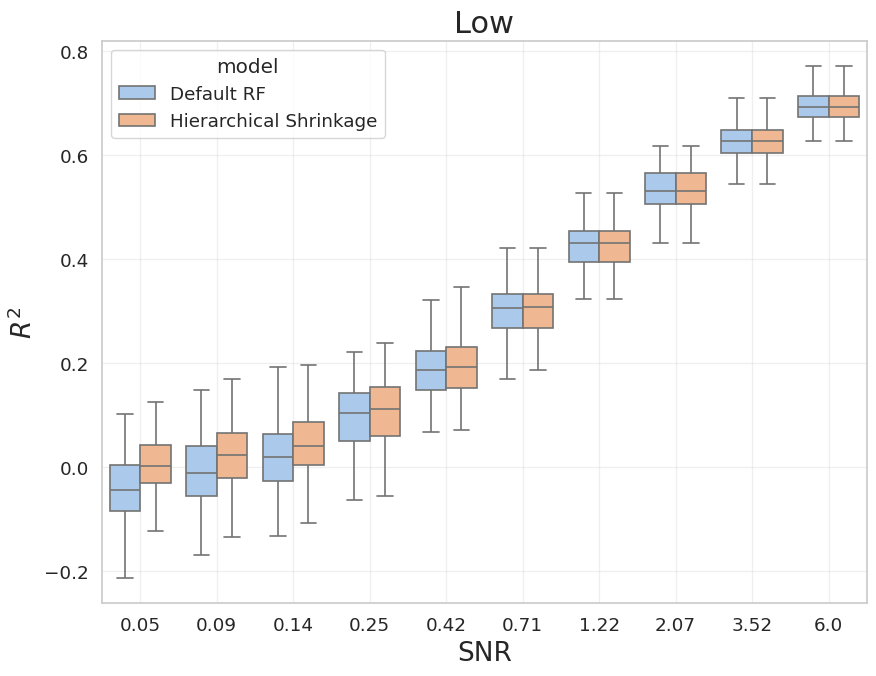

In [3]:
df = pd.read_pickle(os.path.join(pkl_dir, "hs_mse_low_parallel.pkl"))

df_best = (df.sort_values("rte_best")
             .groupby(["snr", "rep"], as_index=False)
             .first())
idx = df.groupby(["snr", "rep"])["rte_best"].idxmin()
best_rows = df.loc[idx].reset_index(drop=True)


#recompute r2 for default and best shrinkage model
df_best["r2_def"]  = 1 - df_best["rte_def"]  / (1 + df_best["snr"])
df_best["r2_best"] = 1 - df_best["rte_best"] / (1 + df_best["snr"])

#long format for boxplot
df_r2 = df_best[["snr", "rep", "r2_def", "r2_best"]].melt(
    id_vars=["snr", "rep"],
    value_vars=["r2_def", "r2_best"],
    var_name="model", value_name="r2"
)

#renaming and cleaning
df_r2["model"] = df_r2["model"].map({
    "r2_def": "Default RF",
    "r2_best": "Hierarchical Shrinkage"
})

sns.set_palette("pastel")
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

plt.figure(figsize=(9, 7))
sns.boxplot(
    data=df_r2,
    x="snr",
    y="r2",
    hue="model",
    showfliers=False,
    #legend=False,
    linewidth=1.2
)

#change as needed
plt.xlabel("SNR", fontsize = 19)
plt.ylabel("$R^2$", fontsize = 19)
plt.title("Low", fontsize = 22)
plt.grid(True, alpha=0.3)
plt.tight_layout()

#saving plot
#plt.savefig(os.path.join(path, "R2_boxplot_low1.png"), dpi=500)